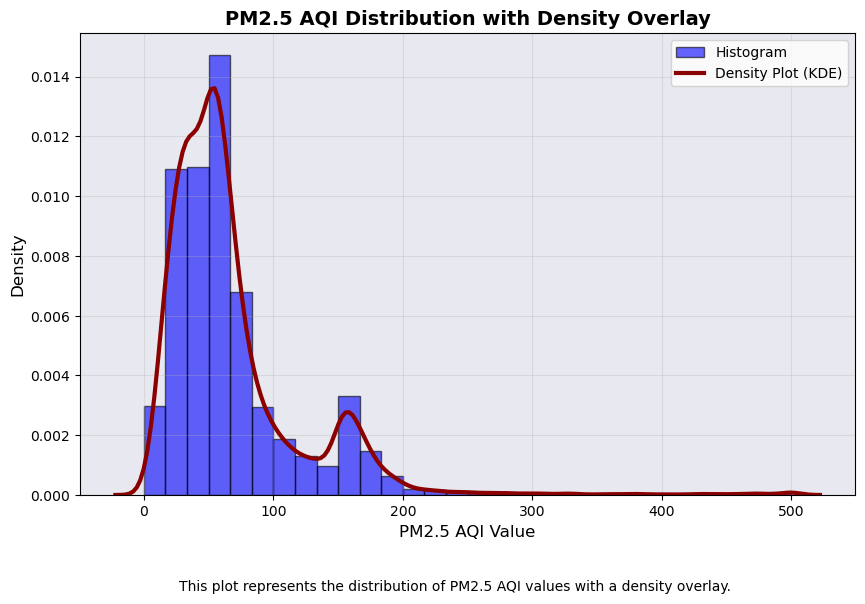

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

air_pollution_df = pd.read_csv("global_air_pollution_dataset.csv")

pm25_values = air_pollution_df["PM2.5_AQI_Value"].dropna()

plt.figure(figsize=(10, 6))

plt.hist(pm25_values, bins=30, density=True, alpha=0.6, color="blue", edgecolor="black", label="Histogram")

sns.kdeplot(pm25_values, color="darkred", linewidth=3, label="Density Plot (KDE)")

plt.xlabel("PM2.5 AQI Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("PM2.5 AQI Distribution with Density Overlay", fontsize=14, fontweight="bold")

plt.gca().set_facecolor("#e8e8f0")
plt.grid(alpha=0.3)
plt.legend()
plt.figtext(0.5, -0.05, "This plot represents the distribution of PM2.5 AQI values with a density overlay.", 
            wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


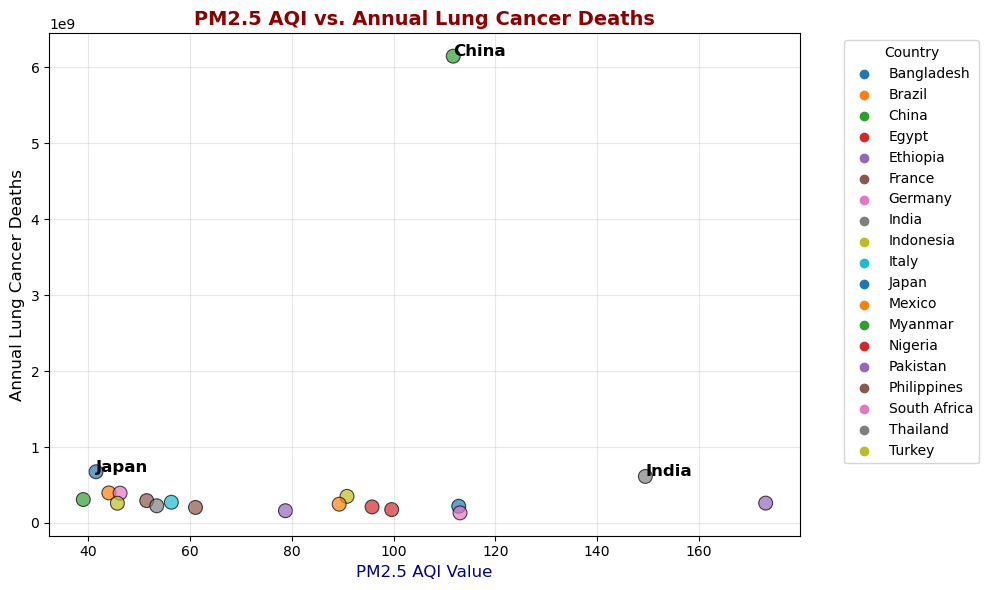

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lung_cancer_df = pd.read_csv("lung_cancer_prediction_dataset.csv")
air_pollution_df = pd.read_csv("global_air_pollution_dataset.csv")

lung_cancer_summary = lung_cancer_df.groupby("Country", as_index=False)["Annual_Lung_Cancer_Deaths"].sum()
air_pollution_summary = air_pollution_df.groupby("Country", as_index=False)["PM2.5_AQI_Value"].mean()

merged_data = pd.merge(lung_cancer_summary, air_pollution_summary, on="Country")

highlight_countries = ["China", "India", "Japan"]

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=merged_data, x="PM2.5_AQI_Value", y="Annual_Lung_Cancer_Deaths", hue="Country",
    palette="tab10", edgecolor="black", s=100, alpha=0.7
)

for i, row in merged_data.iterrows():
    if row["Country"] in highlight_countries:
        plt.text(row["PM2.5_AQI_Value"], row["Annual_Lung_Cancer_Deaths"], row["Country"], 
                 fontsize=12, fontweight="bold", color="black")

plt.title("PM2.5 AQI vs. Annual Lung Cancer Deaths", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("PM2.5 AQI Value", fontsize=12, color="darkblue")
plt.ylabel("Annual Lung Cancer Deaths", fontsize=12, color="black")

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()
